In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images /255.0, test_images/255.0
classes = [0,1,2,3,4,5,6,7,8,9]

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\S7U05475\AppData\Local\anaconda3\envs\tf-cpu\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    x=train_images,
    y=train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8952 - loss: 0.3364 - val_accuracy: 0.9829 - val_loss: 0.0538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9846 - loss: 0.0490 - val_accuracy: 0.9881 - val_loss: 0.0372
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9897 - loss: 0.0319 - val_accuracy: 0.9892 - val_loss: 0.0325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9924 - loss: 0.0228 - val_accuracy: 0.9881 - val_loss: 0.0382
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9915 - val_loss: 0.0283


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


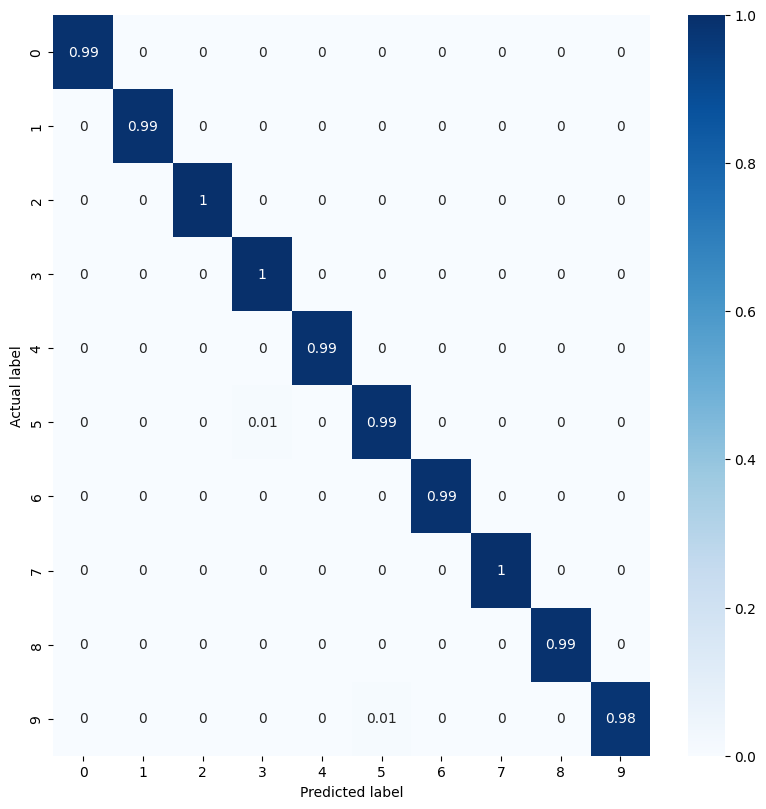

In [7]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=1)
classes = [0,1,2,3,4,5,6,7,8,9]

confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
confusion_matrix_norm = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)
confusion_matrix_df = pd.DataFrame(confusion_matrix_norm, index=classes, columns=classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [8]:
confusion_matrix_df

,0,1,2,3,4,5,6,7,8,9
0,0.99,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1,0.00,0.99,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
3,0.00,0.00,0.0,1.00,0.00,0.00,0.00,0.0,0.00,0.00
4,0.00,0.00,0.0,0.00,0.99,0.00,0.00,0.0,0.00,0.00
5,0.00,0.00,0.0,0.01,0.00,0.99,0.00,0.0,0.00,0.00
6,0.00,0.00,0.0,0.00,0.00,0.00,0.99,0.0,0.00,0.00
7,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.0,0.00,0.00
8,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.99,0.00
9,0.00,0.00,0.0,0.00,0.00,0.01,0.00,0.0,0.00,0.98


In [ ]:
con_mat_metrics = pd.DataFrame(index=classes)
con_mat_metrics['sensibility'] = confusion_matrix_df.apply(lambda row: row[row.name] / row.sum(), axis=1)

def specificity(row:pd.Series) -> float:
    fp_tn = confusion_matrix_df[confusion_matrix_df.index != row.name]
    tn = fp_tn[[col for col in fp_tn.columns if col != row.name]]
    return tn.sum().sum()/fp_tn.sum().sum()

con_mat_metrics['specificity'] = confusion_matrix_df.apply(specificity, axis=1)

def recall(row:pd.Series) -> float:
    tp = row[row.name]
    fn = row[[col for col in row.index if col != row.name]]
    return tp / (tp + fn.sum())

con_mat_metrics['recall'] = confusion_matrix_df.apply(recall, axis=1)

def accuracy(row:pd.Series) -> float:
    tp = row[row.name]
    tn = confusion_matrix_df[confusion_matrix_df.index != row.name][[col for col in confusion_matrix_df.columns if col != row.name]]
    return (tp + tn.sum().sum()) / confusion_matrix_df.sum().sum()

con_mat_metrics['accuracy'] = confusion_matrix_df.apply(accuracy, axis=1)

def precision(row:pd.Series) -> float:
    tp = row[row.name]
    positive = confusion_matrix_df[[row.name]]
    return tp / positive.sum().sum()

con_mat_metrics['precision'] = confusion_matrix_df.apply(precision, axis=1)

con_mat_metrics['f-score'] = 2 * con_mat_metrics['precision'] * con_mat_metrics['sensibility'] / (con_mat_metrics['precision'] + con_mat_metrics['sensibility'])

display(con_mat_metrics)

,sensibility,specificity,recall,accuracy,precision,f-score
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,0.998881,1.000000,0.998994,0.990099,0.995025
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.990000,0.998881,0.990000,0.997988,0.990000,0.990000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,0.989899,1.000000,0.989899,0.998994,1.000000,0.994924
